**USE CASE**

1. Have List of  documents -- Loan/Policy documnets

2. Create embeddings for those documents and store it in VectorDB

3. User Input

4. Fetch Related documents from VectorDB

5. Input to LLM as context

6. Get the answers for user Query

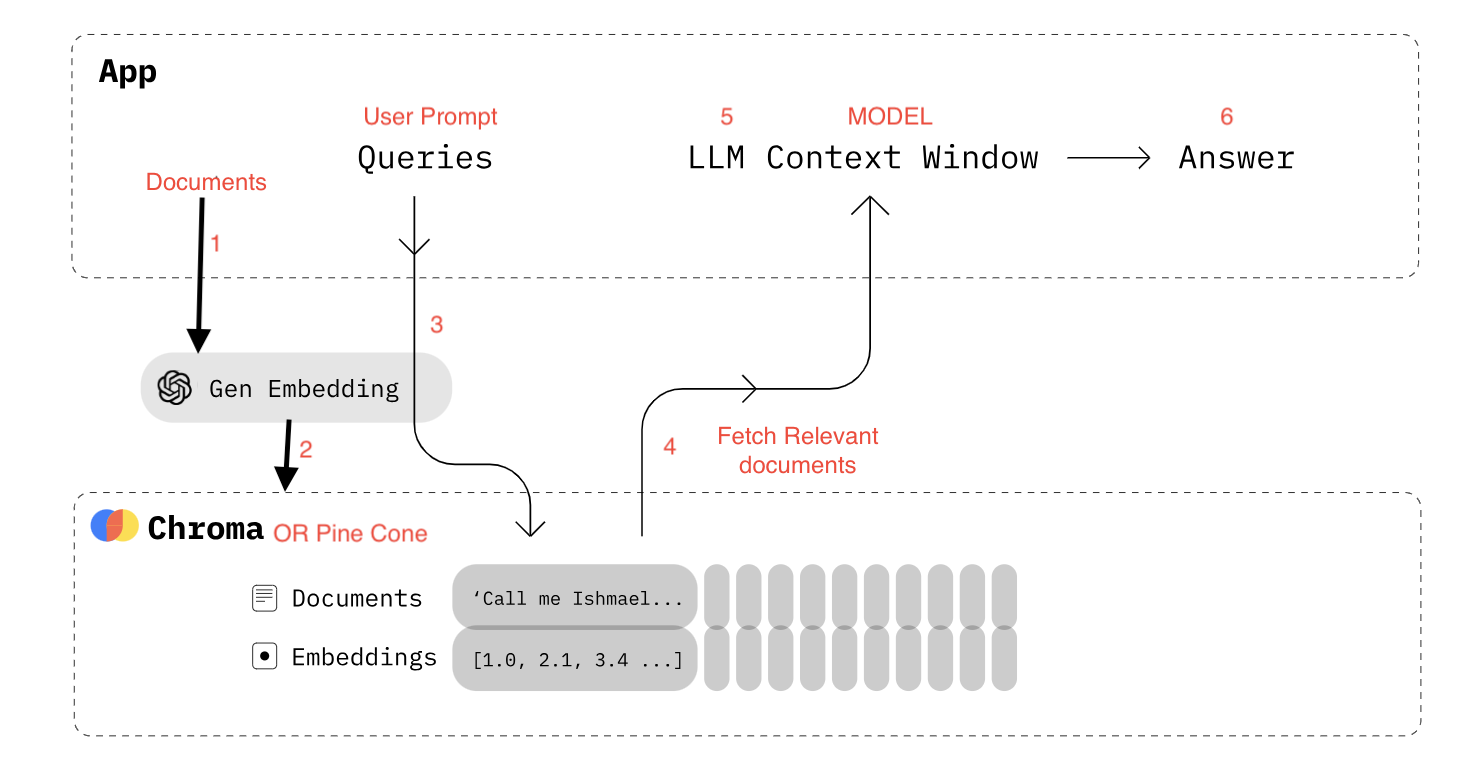

## What's embedding
## ----------------------------

## Converting a piece of text/document into numerical representation.

## It's numical representation of text/docuemnt/image/video with schemantic relationship called vectors

#https://www.featureform.com/post/the-definitive-guide-to-embeddings

## What's vector dabase
## -----------------------------

## It's a database to store vectors and Perform verctor search(similarity search)

## Popular vector databases implementations

## 1. https://www.pinecone.io/

## 2. https://weaviate.io/

## 3. https://www.trychroma.com/   -- Chroma DB

## Embeddings genereations Models

# 1. https://huggingface.co/sentence-transformers

# 2. https://www.tensorflow.org

# 3. https://www.tensorflow.org/


## 1. Download libraries

In [1]:
!pip install -qU \
  "pinecone-client[grpc]"==2.2.1 \
  pinecone-datasets=='0.3.1-alpha' \
  sentence-transformers==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.5 MB/s eta 0:00:00

## 2. How to generate Embeddings for given a setence

In [2]:

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Sentences we want to encode. Example:
sentence = ['This framework generates embeddings for each input sentence']


#Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)


In [3]:
print(embedding)
len(embedding[0])

[[-1.76214308e-01  1.20601527e-01 -2.93623656e-01 -2.29858086e-01
  -8.22924376e-02  2.37709433e-01  3.39985073e-01 -7.80964732e-01
   1.18127413e-01  1.63373917e-01 -1.37715220e-01  2.40282521e-01
   4.25125808e-01  1.72417894e-01  1.05279557e-01  5.18164217e-01
   6.22219406e-02  3.99285614e-01 -1.81652293e-01 -5.85578561e-01
   4.49719355e-02 -1.72750562e-01 -2.68443555e-01 -1.47386163e-01
  -1.89217985e-01  1.92150742e-01 -3.83842617e-01 -3.96006852e-01
   4.30648923e-01 -3.15319955e-01  3.65949780e-01  6.05157837e-02
   3.57325822e-01  1.59736261e-01 -3.00983787e-01  2.63250142e-01
  -3.94311309e-01  1.84855610e-01 -3.99548948e-01 -2.67889619e-01
  -5.45117140e-01 -3.13405767e-02 -4.30643886e-01  1.33278102e-01
  -1.74794018e-01 -4.35465515e-01 -4.77379054e-01  7.12554753e-02
  -7.36999810e-02  5.69136858e-01 -2.82579780e-01  5.24974614e-02
  -8.20007861e-01  1.98296845e-01  1.69511899e-01  2.71779865e-01
   2.64610946e-01 -2.55737640e-02 -1.74096435e-01  1.63314074e-01
  -3.95260

384

---

🚨 _Note: the above `pip install` is formatted for Jupyter notebooks. If running elsewhere you may need to drop the `!`._

---

## 3. Data Download

In this notebook we will skip the data preparation steps as they can be very time consuming and jump straight into it with the prebuilt dataset from *Pinecone Datasets*. If you'd rather see how it's all done, please refer to [this notebook](https://colab.research.google.com/github/pinecone-io/examples/blob/master/search/semantic-search/semantic-search.ipynb).

Let's go ahead and download the dataset.

In [ ]:
# from tqdm.auto import tqdm

# batch_size = 128

# for i in tqdm(range(0, len(questions), batch_size)):
#     # find end of batch
#     i_end = min(i+batch_size, len(questions))
#     # create IDs batch
#     ids = [str(x) for x in range(i, i_end)]
#     # create metadata batch
#     metadatas = [{'text': text} for text in questions[i:i_end]]
#     # create embeddings
#     xc = model.encode(questions[i:i_end])
#     # create records list for upsert
#     records = zip(ids, xc, metadatas)
#     # upsert to Pinecone
#     index.upsert(vectors=records)

# # check number of records in the index
# index.describe_index_stats()

In [4]:
from pinecone_datasets import list_datasets, load_dataset

list_datasets()
# ["quora_all-MiniLM-L6-bm25", ... ]

dataset = load_dataset("quora_all-MiniLM-L6-bm25")

dataset.head()

TypeError: ignored

In [ ]:
from pinecone_datasets import load_dataset

dataset = load_dataset('quora_all-MiniLM-L6-bm25')
# we drop sparse_values as they are not needed for this example
dataset.documents.drop(['sparse_values', 'metadata'], axis=1, inplace=True)
dataset.documents.rename(columns={'blob': 'metadata'}, inplace=True)
# we will use 80K rows of the dataset between rows 240K -> 320K
dataset.documents.drop(dataset.documents.index[320_000:], inplace=True)
dataset.documents.drop(dataset.documents.index[:240_000], inplace=True)
dataset.head()

In [ ]:
len(dataset)

## 4. Creating an Index

Now the data is ready, we can set up our index to store it.

We begin by initializing our connection to Pinecone. To do this we need a [free API key](https://app.pinecone.io).

In [ ]:
import os
import pinecone

# get api key from app.pinecone.io
#PINECONE_API_KEY = os.environ.get('PINECONE_API_KEY') or 'PINECONE_API_KEY'
# find your environment next to the api key in pinecone console
#PINECONE_ENV = os.environ.get('PINECONE_ENVIRONMENT') or 'PINECONE_ENVIRONMENT'
PINECONE_ENV='us-west1-gcp-free'
PINECONE_API_KEY='9a70fdc8-3994-4d5d-9ad6-379b862ca6f9'
pinecone.init(
    api_key=PINECONE_API_KEY,
    environment=PINECONE_ENV
)

Now we create a new index called `semantic-search-fast`. It's important that we align the index `dimension` and `metric` parameters with those required by the `MiniLM-L6` model.

In [ ]:
import time

index_name = 'semantic-search-fast'

# only create index if it doesn't exist
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        name=index_name,
        dimension=len(dataset.documents.iloc[0]['values']),
        metric='cosine'
    )
    # wait a moment for the index to be fully initialized
    time.sleep(1)

# now connect to the index
index = pinecone.GRPCIndex(index_name)

Upsert the data:

In [ ]:
index = pinecone.GRPCIndex(index_name)
index.upsert_from_dataframe(dataset.documents)

## 5. Making Queries

Now that our index is populated we can begin making queries. We are performing a semantic search for *similar questions*, so we should embed and search with another question. Let's begin.

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
model

Now let's query.

In [ ]:
query = "which city has the highest population in the world?"

# create the query vector
xq = model.encode(query).tolist()

# now query
xc = index.query(xq, top_k=5, include_metadata=True)
xc

In the returned response `xc` we can see the most relevant questions to our particular query — we don't have any exact matches but we can see that the returned questions are similar in the topics they are asking about. We can reformat this response to be a little easier to read:

In [ ]:
for result in xc['matches']:
    print(f"{round(result['score'], 2)}: {result['metadata']['text']}")

These are good results, let's try and modify the words being used to see if we still surface similar results.

In [ ]:
query = "which metropolis has the least number of people in the world?"

# create the query vector
xq = model.encode(query).tolist()

# now query
xc = index.query(xq, top_k=5, include_metadata=True)
for result in xc['matches']:
    print(f"{round(result['score'], 2)}: {result['metadata']['text']}")

Here we used different terms in our query than that of the returned documents. We substituted **"city"** for **"metropolis"** and **"populated"** for **"number of people"**.

Despite these very different terms and *lack* of term overlap between query and returned documents — we get highly relevant results — this is the power of *semantic search*.

You can go ahead and ask more questions above. When you're done, delete the index to save resources:

  7. ## Delete Index

In [ ]:
pinecone.delete_index(index_name)